In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("D:/IBM/market basket insights1.csv")
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from matplotlib import pyplot as plt


In [2]:
print(data)

     BillNo                             Itemname  Quantity              Date  \
0    536365   WHITE HANGING HEART T-LIGHT HOLDER         6  01-12-2010 08:26   
1    536365                  WHITE METAL LANTERN         6  01-12-2010 08:26   
2    536365       CREAM CUPID HEARTS COAT HANGER         8  01-12-2010 08:26   
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE         6  01-12-2010 08:26   
4    536365       RED WOOLLY HOTTIE WHITE HEART.         6  01-12-2010 08:26   
..      ...                                  ...       ...               ...   
538  536412    ROUND SNACK BOXES SET OF 4 FRUITS         1  01-12-2010 11:49   
539  536412    ROUND SNACK BOXES SET OF 4 SKULLS         1  01-12-2010 11:49   
540  536412                 DOLLY GIRL LUNCH BOX         1  01-12-2010 11:49   
541  536412                   SPACEBOY LUNCH BOX         1  01-12-2010 11:49   
542  536412                 GREEN POLKADOT PLATE         1  01-12-2010 11:49   

     Price  CustomerID         Country 

In [3]:
a=data.head(200)
print(a)

     BillNo                             Itemname  Quantity              Date  \
0    536365   WHITE HANGING HEART T-LIGHT HOLDER         6  01-12-2010 08:26   
1    536365                  WHITE METAL LANTERN         6  01-12-2010 08:26   
2    536365       CREAM CUPID HEARTS COAT HANGER         8  01-12-2010 08:26   
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE         6  01-12-2010 08:26   
4    536365       RED WOOLLY HOTTIE WHITE HEART.         6  01-12-2010 08:26   
..      ...                                  ...       ...               ...   
195  536389         CHRISTMAS LIGHTS 10 REINDEER         6  01-12-2010 10:03   
196  536389     VINTAGE UNION JACK CUSHION COVER         8  01-12-2010 10:03   
197  536389    VINTAGE HEADS AND TAILS CARD GAME        12  01-12-2010 10:03   
198  536389      SET OF 3 COLOURED  FLYING DUCKS         6  01-12-2010 10:03   
199  536389           SET OF 3 GOLD FLYING DUCKS         4  01-12-2010 10:03   

     Price  CustomerID         Country 

In [4]:
data.columns



Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')

In [5]:
data.tail


<bound method NDFrame.tail of      BillNo                             Itemname  Quantity              Date  \
0    536365   WHITE HANGING HEART T-LIGHT HOLDER         6  01-12-2010 08:26   
1    536365                  WHITE METAL LANTERN         6  01-12-2010 08:26   
2    536365       CREAM CUPID HEARTS COAT HANGER         8  01-12-2010 08:26   
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE         6  01-12-2010 08:26   
4    536365       RED WOOLLY HOTTIE WHITE HEART.         6  01-12-2010 08:26   
..      ...                                  ...       ...               ...   
538  536412    ROUND SNACK BOXES SET OF 4 FRUITS         1  01-12-2010 11:49   
539  536412    ROUND SNACK BOXES SET OF 4 SKULLS         1  01-12-2010 11:49   
540  536412                 DOLLY GIRL LUNCH BOX         1  01-12-2010 11:49   
541  536412                   SPACEBOY LUNCH BOX         1  01-12-2010 11:49   
542  536412                 GREEN POLKADOT PLATE         1  01-12-2010 11:49   

     Pric

In [6]:
#perprocessing
data.describe()

,BillNo,Quantity,Price,CustomerID
count,543.000000,543.000000,543.000000,540.000000
mean,536393.009208,15.751381,3.462836,15858.838889
std,13.476846,37.064655,7.697595,1800.149486
min,536365.000000,1.000000,0.100000,12431.000000
25%,536381.000000,2.000000,1.250000,14307.000000
50%,536396.000000,6.000000,2.100000,15862.000000
75%,536405.500000,12.000000,3.750000,17850.000000
max,536412.000000,432.000000,165.000000,18074.000000


In [7]:
data.isnull().sum()

BillNo        0
Itemname      4
Quantity      0
Date          0
Price         0
CustomerID    3
Country       0
dtype: int64

In [8]:
data.isnull().sum()

BillNo        0
Itemname      4
Quantity      0
Date          0
Price         0
CustomerID    3
Country       0
dtype: int64

In [9]:
data.BillNo=data.BillNo.fillna("unknow")

In [10]:
print(data.BillNo)

0      536365
1      536365
2      536365
3      536365
4      536365
        ...  
538    536412
539    536412
540    536412
541    536412
542    536412
Name: BillNo, Length: 543, dtype: int64


In [11]:
data.isnull().sum()

BillNo        0
Itemname      4
Quantity      0
Date          0
Price         0
CustomerID    3
Country       0
dtype: int64

In [12]:
data.Date=data.Date.fillna("unknow")

In [13]:
data.Itemname=data.Itemname.fillna("unknow")

In [14]:
data.Price=data.Price.fillna("unknow")

In [15]:
data.CustomerID=data.CustomerID.fillna("unknow")
data.Country=data.Country.fillna("unknow")

In [16]:
data.isnull().sum()


BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      543 non-null    int64  
 1   Itemname    543 non-null    object 
 2   Quantity    543 non-null    int64  
 3   Date        543 non-null    object 
 4   Price       543 non-null    float64
 5   CustomerID  543 non-null    object 
 6   Country     543 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 29.8+ KB


In [18]:
data


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
538,536412,ROUND SNACK BOXES SET OF 4 FRUITS,1,01-12-2010 11:49,2.95,17920.0,United Kingdom
539,536412,ROUND SNACK BOXES SET OF 4 SKULLS,1,01-12-2010 11:49,2.95,17920.0,United Kingdom
540,536412,DOLLY GIRL LUNCH BOX,1,01-12-2010 11:49,1.95,17920.0,United Kingdom
541,536412,SPACEBOY LUNCH BOX,1,01-12-2010 11:49,1.95,17920.0,United Kingdom


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      543 non-null    int64  
 1   Itemname    543 non-null    object 
 2   Quantity    543 non-null    int64  
 3   Date        543 non-null    object 
 4   Price       543 non-null    float64
 5   CustomerID  543 non-null    object 
 6   Country     543 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 29.8+ KB


In [20]:
best_selling_items = data.groupby(['Country', 'Itemname']).agg({'Quantity': 'sum'}).reset_index()
best_selling_items = best_selling_items.groupby('Country').apply(lambda x: x[x['Quantity'] == x['Quantity'].max()]).reset_index(drop=True)
best_selling_items.sort_values("Quantity",ascending=False)

,Country,Itemname,Quantity
4,United Kingdom,RED TOADSTOOL LED NIGHT LIGHT,434
3,Netherlands,HAND WARMER BIRD DESIGN,96
2,France,INFLATABLE POLITICAL GLOBE,48
0,Australia,LARGE HEART MEASURING SPOONS,24
1,Australia,SMALL HEART MEASURING SPOONS,24


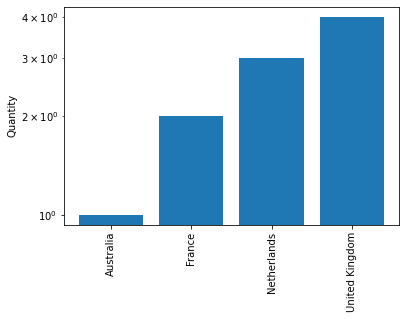

In [21]:
from matplotlib import pyplot as plt
plt.bar(best_selling_items['Country'],best_selling_items['Itemname'])
plt.yscale('log')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()



Text(0.5, 1.0, 'Quantity')

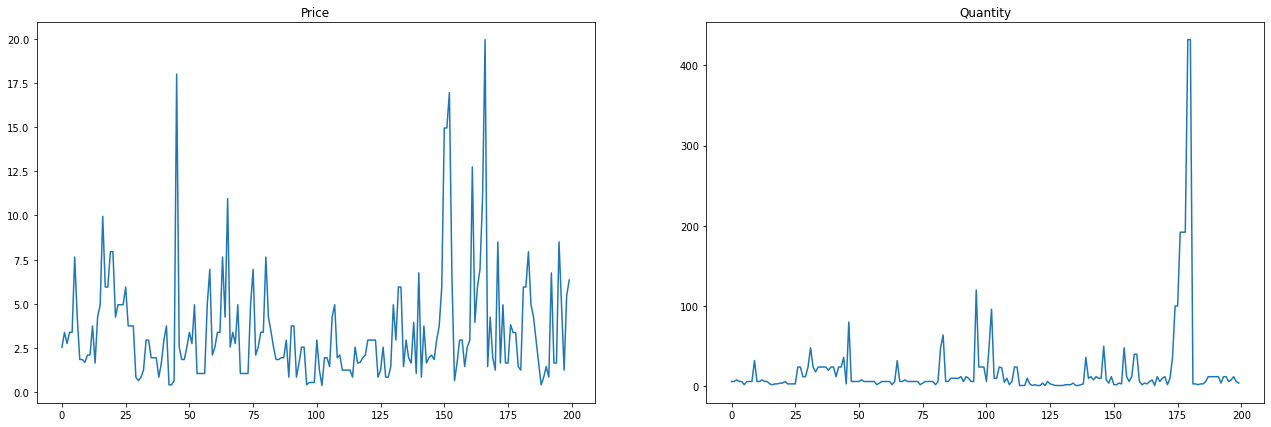

In [22]:
from matplotlib import pyplot as plt
plt.figure(figsize=(22,7))
plt.subplot(1,2,1)
a.Price.plot()
plt.title("Price")
plt.subplot(1,2,2)
a.Quantity.plot()
plt.title("Quantity")


In [23]:
import seaborn as sns

<AxesSubplot:>

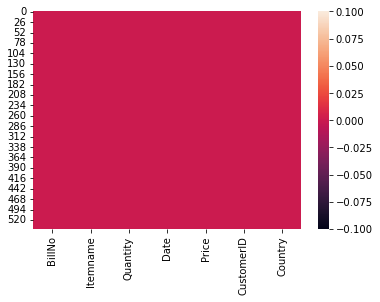

In [24]:
sns.heatmap(data.isnull())

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(1, 0, 'WHITE METAL LANTERN'),
  Text(2, 0, 'CREAM CUPID HEARTS COAT HANGER'),
  Text(3, 0, 'KNITTED UNION FLAG HOT WATER BOTTLE'),
  Text(4, 0, 'RED WOOLLY HOTTIE WHITE HEART.'),
  Text(5, 0, 'SET 7 BABUSHKA NESTING BOXES'),
  Text(6, 0, 'GLASS STAR FROSTED T-LIGHT HOLDER'),
  Text(7, 0, 'HAND WARMER UNION JACK'),
  Text(8, 0, 'WOOD 2 DRAWER CABINET WHITE FINISH'),
  Text(9, 0, 'HAND WARMER SCOTTY DOG DESIGN')])

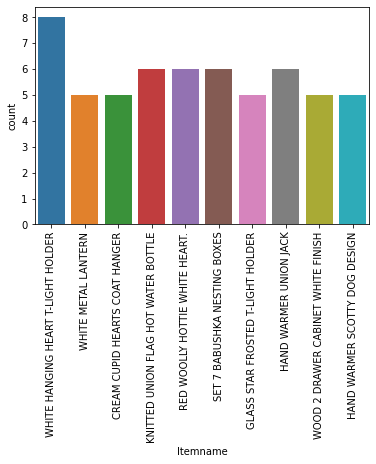

In [25]:
# Get the top 10 item names by count
top_10_items = data['Itemname'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 item names
df_top_10 = data[data['Itemname'].isin(top_10_items)]

# Create a countplot for the top 10 item names
ax=sns.countplot(data=df_top_10, x='Itemname')
plt.xticks(rotation=90)

In [27]:
data = data[data['Itemname'].notna()]
print("Number of unique items:", data['Itemname'].nunique())
print(data['Itemname'].value_counts(normalize=True)[:5])

Number of unique items: 361
WHITE HANGING HEART T-LIGHT HOLDER     0.014733
HAND WARMER UNION JACK                 0.011050
KNITTED UNION FLAG HOT WATER BOTTLE    0.011050
RED WOOLLY HOTTIE WHITE HEART.         0.011050
SET 7 BABUSHKA NESTING BOXES           0.011050
Name: Itemname, dtype: float64


In [ ]:
data.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='barh', title='Number of Quantity Sold')
plt.ylabel('Item Name')
plt.xlim(20000, 82000)
plt.show()

# Plotting the top 10 most sold products by count
data['Itemname'].value_counts(ascending=False)[:10].plot(kind='barh', title='Number of Sales')
plt.ylabel('Item Name')
plt.xlim(0, 10)
plt.show()

In [ ]:
#association rulls
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


df = pd.read_csv("D:/IBM/market basket insights1.csv",names=['itemname'
],sep=',')  
a=df.head(500)  
print(a)
data = list(a["itemname"].apply(lambda x:x.split(",") ))
print(data)   

b = TransactionEncoder()
b_data = b.fit(data).transform(data)
df = pd.DataFrame(b_data,columns=b.columns_)
df = df.replace(False,0)
print(df)

df = apriori(df, min_support = 0.2, use_colnames = True, verbose = 1)
print(df)


In [ ]:
total_sales = data
total_sales["Total_Price"] = total_sales["Price"] * total_sales["Quantity"]
#total_sales.columns
total_sales_per_customer = total_sales.groupby(["CustomerID", "Country"]).agg({"Total_Price": "sum"})
total_sales_per_customer.head(100)


In [ ]:
plt.rcParams['figure.figsize'] = (10,6)
color = plt.cm.inferno(np.linspace(0,1,20))
data[0].value_counts().head(20).plot.bar(color = color)
plt.title('Top 20 Most Frequent Items')
plt.ylabel('Counts')
plt.xlabel('Items')
plt.show()
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()